In [124]:
# import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import sklearn
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
#
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures()
#
import os
import numpy as np
import scipy.stats as stats
from statsmodels.formula.api import ols
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multicomp import MultiComparison
#
from sklearn.preprocessing import LabelEncoder
make_lb = LabelEncoder()
#
from sklearn.preprocessing import LabelBinarizer
lbb = LabelBinarizer()
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
from sklearn.preprocessing import MinMaxScaler
minmax = MinMaxScaler()
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import GridSearchCV

In [318]:
df = pd.read_csv('weatherAUS.csv')
df['location'].value_counts

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0.0,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0.0,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0.0,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,1.0,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0.2,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142188,2017-06-20,Uluru,3.5,21.8,0.0,NaN,NaN,E,31.0,ESE,E,15.0,13.0,59.0,27.0,1024.7,1021.2,NaN,NaN,9.4,20.9,No,0.0,No
142189,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,ENE,13.0,11.0,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,0.0,No
142190,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,N,13.0,9.0,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,0.0,No
142191,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,WNW,9.0,9.0,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,0.0,No


In [319]:
df.columns=df.columns.str.lower()

In [325]:
# Gives me a percentage missing in the data
# Looking at some big values that make me think two things
## One, impute the value somehow
## Two, drop them entirely, and be happy with hopefully 50,000 data points
pd.Series(df.isnull().sum().values/len(df), index=df.columns)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142193 entries, 0 to 142192
Data columns (total 24 columns):
date             142193 non-null object
location         142193 non-null object
mintemp          141556 non-null float64
maxtemp          141871 non-null float64
rainfall         140787 non-null float64
evaporation      81350 non-null float64
sunshine         74377 non-null float64
windgustdir      132863 non-null object
windgustspeed    132923 non-null float64
winddir9am       132180 non-null object
winddir3pm       138415 non-null object
windspeed9am     140845 non-null float64
windspeed3pm     139563 non-null float64
humidity9am      140419 non-null float64
humidity3pm      138583 non-null float64
pressure9am      128179 non-null float64
pressure3pm      128212 non-null float64
cloud9am         88536 non-null float64
cloud3pm         85099 non-null float64
temp9am          141289 non-null float64
temp3pm          139467 non-null float64
raintoday        140787 non-null obje

`evaporation` is probably going to be really necessary to predict. My thinking of replacing it might skew the data. However, since I don't know which is more important (`pressure, sunshine, humidity, clouds`) I need to come up with a solution.  
I think it could be worth while to simply drop all of the null values, maybe that messes the data up, but then I could get a rough correlation matrix and see what is and isn't important, then clean the data around that.

In [373]:
df_test = df
df_test.dropna(inplace=True)
df_test.shape

(56420, 24)

In [381]:
df['location'].value_counts().keys()

Index(['Darwin', 'Perth', 'Brisbane', 'MelbourneAirport', 'PerthAirport',
       'SydneyAirport', 'Watsonia', 'Mildura', 'MountGambier', 'NorfolkIsland',
       'Cairns', 'Townsville', 'WaggaWagga', 'AliceSprings', 'Nuriootpa',
       'Hobart', 'Moree', 'Melbourne', 'Portland', 'Woomera', 'Sydney', 'Sale',
       'CoffsHarbour', 'Williamtown', 'Canberra', 'Cobar'],
      dtype='object')

And would you look at that!!! I correctly assumed I would have around 50k datapoints....

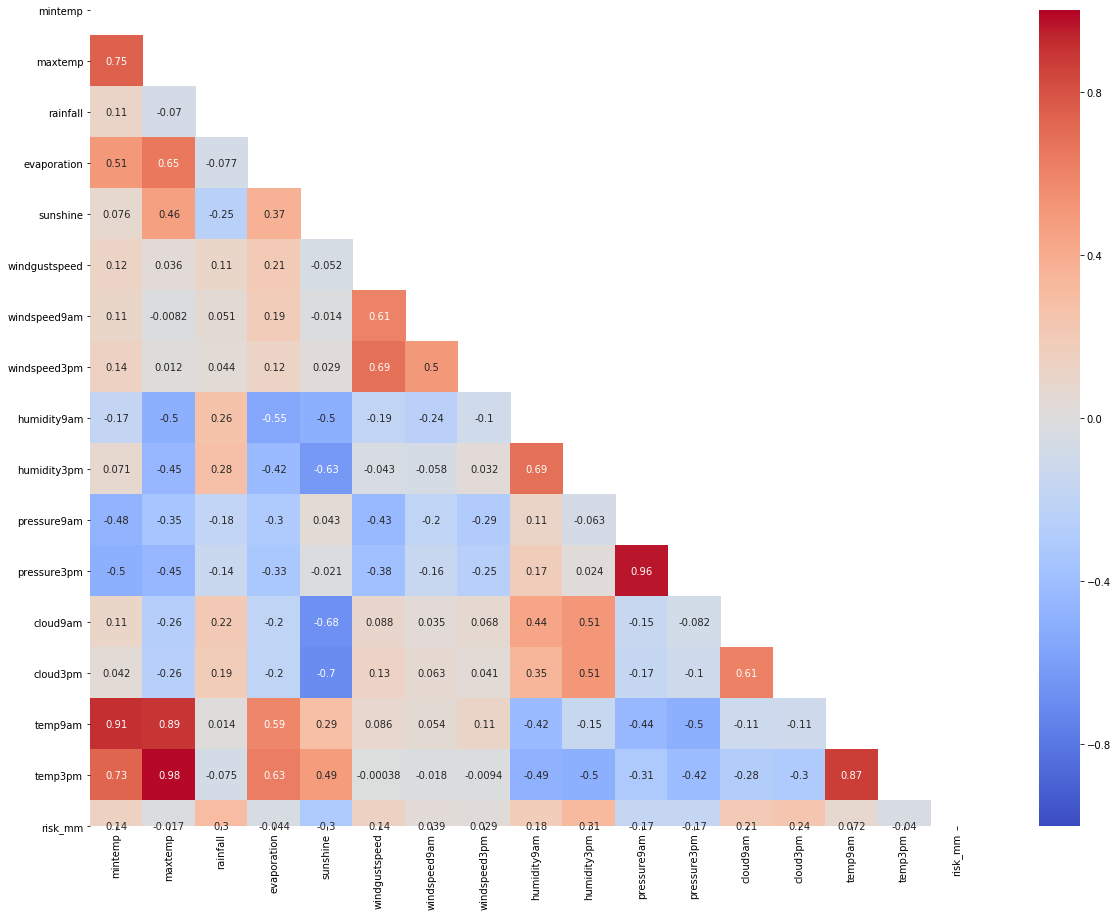

In [286]:
# Looking at the correlation matrix and seeing what interacts etc...
f, ax = plt.subplots(figsize=(20, 15))
matrix = np.triu(df_test.corr())
sns.heatmap(df_test.corr(), annot = True, vmin=-1, vmax=1, center= 0, cmap= 'coolwarm', mask = matrix)

The target variable wasn't included because it currently is a `Yes/No` format.  
Need to map the columns with `Yes/No` to a binary `0/1` layout.  
In addition, all of the `wind` variables need dummies, `raintoday` and `location`

In [287]:
# Dropping `risk_mm` because it was originally used to create the binary for the next day of whether it rained or not
df_test.drop(columns=['risk_mm'], inplace=True)

Keep in mind that Australia is in the other hemisphere. The seasons are reversed. What I am going to do is change the `date` to `season` and change the values to one of the four seasons then dummy them.

In [288]:
df_test.reset_index(drop=True, inplace=True)

In [289]:
type(df_test['date'][0])

str

The data type is string and that could work. The best way I can think of going about this is to remove all of the years and days from the date and then make a map statement saying to put in place a `season` for certain strings.

In [290]:
dates = df_test['date'].map(lambda x: x[5:7])

In [291]:
df_test['dates'] = dates

In [292]:
df_test.drop(columns=['date'], inplace=True)

In [293]:
df_test['season'] = df_test['dates'].map({'01': 'summer', '02': 'summer', '12': 'summer', 
                                         '03': 'autumn', '04': 'autumn', '05': 'autumn',
                                         '06': 'winter', '07': 'winter', '08': 'winter',
                                         '09': 'spring', '10': 'spring', '11': 'spring'})

In [294]:
df_test.head()

,location,mintemp,maxtemp,rainfall,evaporation,sunshine,windgustdir,windgustspeed,winddir9am,winddir3pm,windspeed9am,windspeed3pm,humidity9am,humidity3pm,pressure9am,pressure3pm,cloud9am,cloud3pm,temp9am,temp3pm,raintoday,raintomorrow,dates,season
0,Cobar,17.9,35.2,0.0,12.0,12.3,SSW,48.0,ENE,SW,6.0,20.0,20.0,13.0,1006.3,1004.4,2.0,5.0,26.6,33.4,No,No,01,summer
1,Cobar,18.4,28.9,0.0,14.8,13.0,S,37.0,SSE,SSE,19.0,19.0,30.0,8.0,1012.9,1012.1,1.0,1.0,20.3,27.0,No,No,01,summer
2,Cobar,19.4,37.6,0.0,10.8,10.6,NNE,46.0,NNE,NNW,30.0,15.0,42.0,22.0,1012.3,1009.2,1.0,6.0,28.7,34.9,No,No,01,summer
3,Cobar,21.9,38.4,0.0,11.4,12.2,WNW,31.0,WNW,WSW,6.0,6.0,37.0,22.0,1012.7,1009.1,1.0,5.0,29.1,35.6,No,No,01,summer
4,Cobar,24.2,41.0,0.0,11.2,8.4,WNW,35.0,NW,WNW,17.0,13.0,19.0,15.0,1010.7,1007.4,1.0,6.0,33.6,37.6,No,No,01,summer


In [295]:
df_test.drop(columns=['dates'], inplace=True)

In [296]:
df_test['raintomorrow'] = df_test['raintomorrow'].map({'No': '0', 'Yes': '1'})

In [297]:
df_test.head()

,location,mintemp,maxtemp,rainfall,evaporation,sunshine,windgustdir,windgustspeed,winddir9am,winddir3pm,windspeed9am,windspeed3pm,humidity9am,humidity3pm,pressure9am,pressure3pm,cloud9am,cloud3pm,temp9am,temp3pm,raintoday,raintomorrow,season
0,Cobar,17.9,35.2,0.0,12.0,12.3,SSW,48.0,ENE,SW,6.0,20.0,20.0,13.0,1006.3,1004.4,2.0,5.0,26.6,33.4,No,0,summer
1,Cobar,18.4,28.9,0.0,14.8,13.0,S,37.0,SSE,SSE,19.0,19.0,30.0,8.0,1012.9,1012.1,1.0,1.0,20.3,27.0,No,0,summer
2,Cobar,19.4,37.6,0.0,10.8,10.6,NNE,46.0,NNE,NNW,30.0,15.0,42.0,22.0,1012.3,1009.2,1.0,6.0,28.7,34.9,No,0,summer
3,Cobar,21.9,38.4,0.0,11.4,12.2,WNW,31.0,WNW,WSW,6.0,6.0,37.0,22.0,1012.7,1009.1,1.0,5.0,29.1,35.6,No,0,summer
4,Cobar,24.2,41.0,0.0,11.2,8.4,WNW,35.0,NW,WNW,17.0,13.0,19.0,15.0,1010.7,1007.4,1.0,6.0,33.6,37.6,No,0,summer


In [298]:
df_test['raintomorrow'] = df_test['raintomorrow'].astype(int)

In [299]:
df_test

,location,mintemp,maxtemp,rainfall,evaporation,sunshine,windgustdir,windgustspeed,winddir9am,winddir3pm,windspeed9am,windspeed3pm,humidity9am,humidity3pm,pressure9am,pressure3pm,cloud9am,cloud3pm,temp9am,temp3pm,raintoday,raintomorrow,season
0,Cobar,17.9,35.2,0.0,12.0,12.3,SSW,48.0,ENE,SW,6.0,20.0,20.0,13.0,1006.3,1004.4,2.0,5.0,26.6,33.4,No,0,summer
1,Cobar,18.4,28.9,0.0,14.8,13.0,S,37.0,SSE,SSE,19.0,19.0,30.0,8.0,1012.9,1012.1,1.0,1.0,20.3,27.0,No,0,summer
2,Cobar,19.4,37.6,0.0,10.8,10.6,NNE,46.0,NNE,NNW,30.0,15.0,42.0,22.0,1012.3,1009.2,1.0,6.0,28.7,34.9,No,0,summer
3,Cobar,21.9,38.4,0.0,11.4,12.2,WNW,31.0,WNW,WSW,6.0,6.0,37.0,22.0,1012.7,1009.1,1.0,5.0,29.1,35.6,No,0,summer
4,Cobar,24.2,41.0,0.0,11.2,8.4,WNW,35.0,NW,WNW,17.0,13.0,19.0,15.0,1010.7,1007.4,1.0,6.0,33.6,37.6,No,0,summer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56415,Darwin,19.3,33.4,0.0,6.0,11.0,ENE,35.0,SE,NE,9.0,20.0,63.0,32.0,1013.9,1010.5,0.0,1.0,24.5,32.3,No,0,winter
56416,Darwin,21.2,32.6,0.0,7.6,8.6,E,37.0,SE,SE,13.0,11.0,56.0,28.0,1014.6,1011.2,7.0,0.0,24.8,32.0,No,0,winter
56417,Darwin,20.7,32.8,0.0,5.6,11.0,E,33.0,E,W,17.0,11.0,46.0,23.0,1015.3,1011.8,0.0,0.0,24.8,32.1,No,0,winter
56418,Darwin,19.5,31.8,0.0,6.2,10.6,ESE,26.0,SE,NNW,9.0,17.0,62.0,58.0,1014.9,1010.7,1.0,1.0,24.8,29.2,No,0,winter


Still need to dummy variable: `location, winds, seasons`  
Still need to binary `raintoday`

In [300]:
df_test['raintoday'] = df_test['raintoday'].map({'No': '0', 'Yes': '1'})
df_test['raintoday'] = df_test['raintoday'].astype(int)

In [303]:
df_test['winddir9am'] = df_test['winddir9am'].map({'ENE': 'NE', 'SSE': 'SE', 'SE':'SE', 'ESE':'SE', 'NNE':'NE',
                           'WSW':'SW', 'NNW':'NW', 'SSW':'SW', 'WNW':'NW',
                           'N':'N', 'E':'E', 'S':'S', 'W':'W', 'SW': 'SW',
                           'NW':'NW', 'SE':'SE', 'NE':'NE'
                          })
df_test['winddir3pm'] = df_test['winddir3pm'].map({'ENE': 'NE', 'SSE': 'SE', 'SE':'SE', 'ESE':'SE', 'NNE':'NE',
                           'WSW':'SW', 'NNW':'NW', 'SSW':'SW', 'WNW':'NW',
                           'N':'N', 'E':'E', 'S':'S', 'W':'W', 'SW': 'SW',
                           'NW':'NW', 'SE':'SE', 'NE':'NE'
                          })
df_test['windgustdir'] = df_test['windgustdir'].map({'ENE': 'NE', 'SSE': 'SE', 'SE':'SE', 'ESE':'SE', 'NNE':'NE',
                           'WSW':'SW', 'NNW':'NW', 'SSW':'SW', 'WNW':'NW',
                           'N':'N', 'E':'E', 'S':'S', 'W':'W', 'SW': 'SW',
                           'NW':'NW', 'SE':'SE', 'NE':'NE'
                          })

In [305]:
df_test

,location,mintemp,maxtemp,rainfall,evaporation,sunshine,windgustdir,windgustspeed,winddir9am,winddir3pm,windspeed9am,windspeed3pm,humidity9am,humidity3pm,pressure9am,pressure3pm,cloud9am,cloud3pm,temp9am,temp3pm,raintoday,raintomorrow,season
0,Cobar,17.9,35.2,0.0,12.0,12.3,SW,48.0,NE,NE,6.0,20.0,20.0,13.0,1006.3,1004.4,2.0,5.0,26.6,33.4,0,0,summer
1,Cobar,18.4,28.9,0.0,14.8,13.0,S,37.0,SE,SE,19.0,19.0,30.0,8.0,1012.9,1012.1,1.0,1.0,20.3,27.0,0,0,summer
2,Cobar,19.4,37.6,0.0,10.8,10.6,NE,46.0,NE,NE,30.0,15.0,42.0,22.0,1012.3,1009.2,1.0,6.0,28.7,34.9,0,0,summer
3,Cobar,21.9,38.4,0.0,11.4,12.2,NW,31.0,NW,NW,6.0,6.0,37.0,22.0,1012.7,1009.1,1.0,5.0,29.1,35.6,0,0,summer
4,Cobar,24.2,41.0,0.0,11.2,8.4,NW,35.0,NW,NW,17.0,13.0,19.0,15.0,1010.7,1007.4,1.0,6.0,33.6,37.6,0,0,summer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56415,Darwin,19.3,33.4,0.0,6.0,11.0,NE,35.0,SE,SE,9.0,20.0,63.0,32.0,1013.9,1010.5,0.0,1.0,24.5,32.3,0,0,winter
56416,Darwin,21.2,32.6,0.0,7.6,8.6,E,37.0,SE,SE,13.0,11.0,56.0,28.0,1014.6,1011.2,7.0,0.0,24.8,32.0,0,0,winter
56417,Darwin,20.7,32.8,0.0,5.6,11.0,E,33.0,E,E,17.0,11.0,46.0,23.0,1015.3,1011.8,0.0,0.0,24.8,32.1,0,0,winter
56418,Darwin,19.5,31.8,0.0,6.2,10.6,SE,26.0,SE,SE,9.0,17.0,62.0,58.0,1014.9,1010.7,1.0,1.0,24.8,29.2,0,0,winter


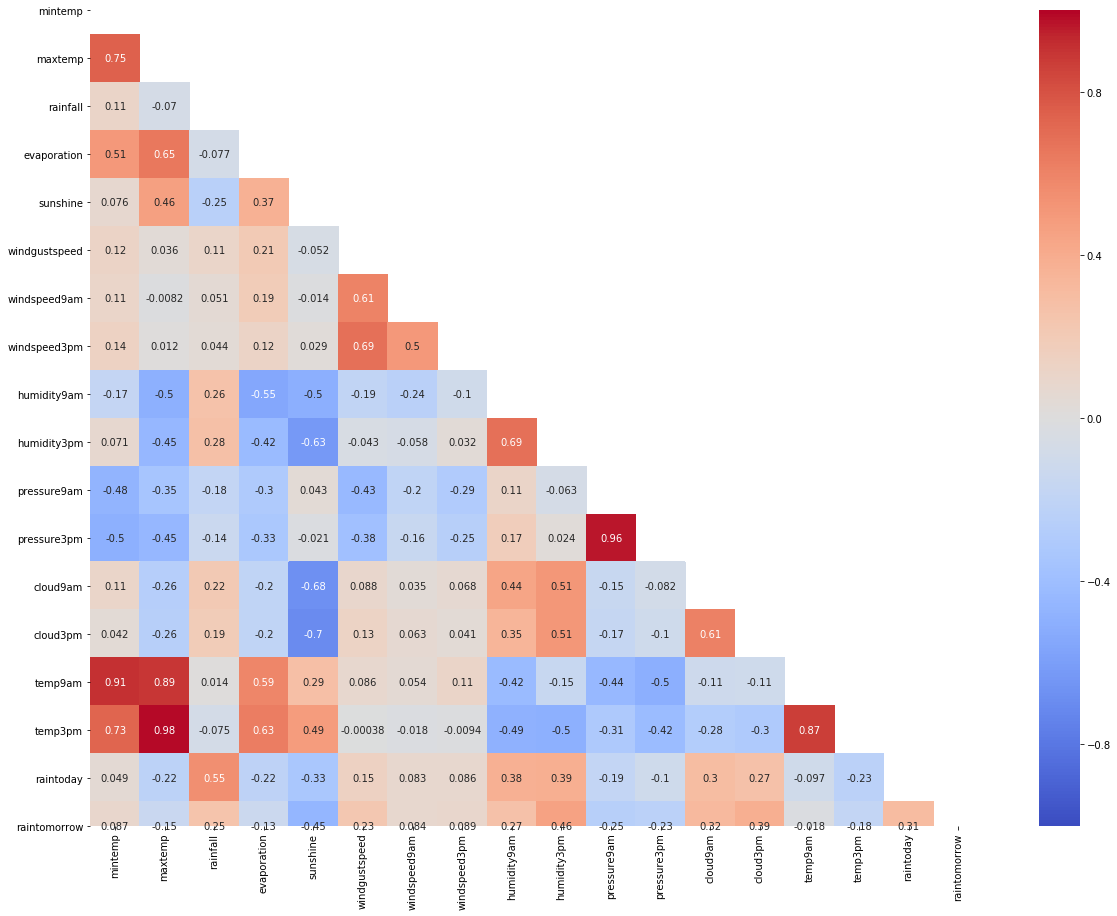

In [306]:
f, ax = plt.subplots(figsize=(20, 15))
matrix = np.triu(df_test.corr())
sns.heatmap(df_test.corr(), annot = True, vmin=-1, vmax=1, center= 0, cmap= 'coolwarm', mask = matrix)

Current goal is to use all columns possible and then use a feature selection algorithm embedded in my classification if possible.

In [249]:
# df_test.drop(columns=['mintemp', 'maxtemp'], inplace=True)

Going to move forward with getting dummies for all. Now remember, there are 26 cities. This could become a mess.

In [307]:
df_test = pd.get_dummies(df_test)

In [311]:
print(df_test.shape)
df_test.head()

(56420, 72)


,mintemp,maxtemp,rainfall,evaporation,sunshine,windgustspeed,windspeed9am,windspeed3pm,humidity9am,humidity3pm,pressure9am,pressure3pm,cloud9am,cloud3pm,temp9am,temp3pm,raintoday,raintomorrow,location_AliceSprings,location_Brisbane,location_Cairns,location_Canberra,location_Cobar,location_CoffsHarbour,location_Darwin,location_Hobart,location_Melbourne,location_MelbourneAirport,location_Mildura,location_Moree,location_MountGambier,location_NorfolkIsland,location_Nuriootpa,location_Perth,location_PerthAirport,location_Portland,location_Sale,location_Sydney,location_SydneyAirport,location_Townsville,location_WaggaWagga,location_Watsonia,location_Williamtown,location_Woomera,windgustdir_E,windgustdir_N,windgustdir_NE,windgustdir_NW,windgustdir_S,windgustdir_SE,windgustdir_SW,windgustdir_W,winddir9am_E,winddir9am_N,winddir9am_NE,winddir9am_NW,winddir9am_S,winddir9am_SE,winddir9am_SW,winddir9am_W,winddir3pm_E,winddir3pm_N,winddir3pm_NE,winddir3pm_NW,winddir3pm_S,winddir3pm_SE,winddir3pm_SW,winddir3pm_W,season_autumn,season_spring,season_summer,season_winter
0,17.9,35.2,0.0,12.0,12.3,48.0,6.0,20.0,20.0,13.0,1006.3,1004.4,2.0,5.0,26.6,33.4,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
1,18.4,28.9,0.0,14.8,13.0,37.0,19.0,19.0,30.0,8.0,1012.9,1012.1,1.0,1.0,20.3,27.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0
2,19.4,37.6,0.0,10.8,10.6,46.0,30.0,15.0,42.0,22.0,1012.3,1009.2,1.0,6.0,28.7,34.9,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
3,21.9,38.4,0.0,11.4,12.2,31.0,6.0,6.0,37.0,22.0,1012.7,1009.1,1.0,5.0,29.1,35.6,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
4,24.2,41.0,0.0,11.2,8.4,35.0,17.0,13.0,19.0,15.0,1010.7,1007.4,1.0,6.0,33.6,37.6,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0


72 columns but I have over 50k rows. I should be okay.  
Based on a previous heatmap, I have some columns I want to drop.  
* `mintemp` and `evaporation` I am going to drop because `maxtemp` does a good job of including those
* based on correlation values, I am going to keep `temp3pm` but drop `temp9am` and `maxtemp`
* dropping `rainfall`
* dropping `windspeed9am` and `windspeed3pm` since it seems `windgustspeed` is strongly related to both


In [313]:
df_test.drop(columns=['mintemp', 'evaporation', 'temp9am', 'maxtemp', 'rainfall',
                     'windspeed9am', 'windspeed3pm'], inplace=True)

In [316]:
df_test.shape

(56420, 65)

Now I am down to a sizeable data frame with a good mix of what I feel are necessary predictors, both categorical and continuous. I am still thinking about binning the cities by region and reducing the size impact dummying 26 cities causes. But we'll see.

In [340]:
logreg = LogisticRegression()
penalty = ['l1', 'l2']
C = np.logspace(0,4,10)
hyperparameters = dict(C=C, penalty=penalty)
clf = GridSearchCV(logreg, hyperparameters, cv=5)
X_80, X_20, y_80, y_20 = train_test_split(df_test.drop(columns=['raintomorrow']), df_test.raintomorrow,
                                                       random_state=42, test_size=0.20)

In [341]:
X_80 = minmax.fit_transform(X_80)

In [342]:
X_80 = pd.DataFrame(X_80, columns=X_20.columns)

In [343]:
best_model = clf.fit(X_80, y_80)
print('Best Penalty:', best_model.best_estimator_.get_params()['penalty'])
print('Best C:', best_model.best_estimator_.get_params()['C'])

Best Penalty: l2
Best C: 7.742636826811269


In [344]:
logreg_2 = LogisticRegression(penalty='l2', C= 7.742636826811269, fit_intercept=False,
                             random_state=42, max_iter=1000)
model_2 = logreg_2.fit(X_80, y_80)
# y_pred_prob2 = model_2.predict_proba(X_test)[:, 1]

In [352]:
y_dot_pred = model_2.predict(X_20)

In [353]:
print(classification_report(y_20, y_dot_pred))

              precision    recall  f1-score   support

           0       0.78      1.00      0.88      8799
           1       0.00      0.00      0.00      2485

    accuracy                           0.78     11284
   macro avg       0.39      0.50      0.44     11284
weighted avg       0.61      0.78      0.68     11284



In [350]:
y_prediction = model_2.predict_proba(X_80)[:, 1]

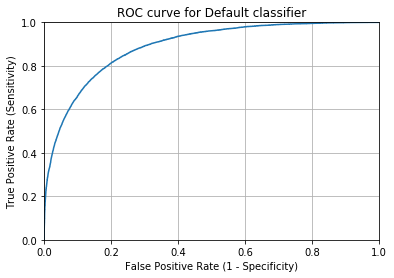

In [351]:
fpr, tpr, thresholds = roc_curve(y_80, y_prediction)
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for Default classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

Data wasn't normalized before  
Going to normalize  
Also going to try `Recursive Feature Elimination`

In [395]:
X = df_test.drop(columns=['raintomorrow'])
y = df_test['raintomorrow']

In [396]:
X_s = minmax.fit_transform(X)
X_s

ValueError: could not convert string to float: '2009-01-01'

In [383]:
X_20 = minmax.fit(X_20)

In [384]:
from sklearn.linear_model import LogisticRegressionCV

In [391]:
logreg = LogisticRegressionCV(Cs=[np.linspace(0,100, 10)], fit_intercept=False, cv=10,
                             penalty='l1', random_state=42, solver='liblinear')

In [392]:
logregcv = logreg.fit(X_80, y_80)
logregcv.score(X_20, y_20)

TypeError: float() argument must be a string or a number, not 'MinMaxScaler'